## Problem set 2 -- Manas Gupta -- 115515307

## Part 1 MNIST data set classification

In this problem set we have been given MNIST data set on which we have to train our deep neural network and classify the numeric digits from 0-9.




In [1]:
# Importing the necessary libraries used for the code
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [27]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import RMSprop, adam
from keras.callbacks import TensorBoard

We have been training data set and the testing data set. We will divide our training data into 2 parts. 90% will keep as the training data and the rest 10% we will keep as the validation data set. The validation data set is very important to test the efficiency of our network befor actually testing it on the test data. 

## 1.1 Loading the data

In [3]:
# loading the data
training_images=np.load('MNIST/trainImages.npy')        # Loading training images
training_labels=np.load('MNIST/trainLabels.npy')        # Loading training labels
test_images=np.load('MNIST/testImages.npy')             # Loading test images
test_labels=np.load('MNIST/testLabels.npy')             # Loading test labels

**Checking the dataset shape-** Its important to check the data set shape before proceeding towards creating and training the network on the given dataset. We have to make sure that our data is in the proper shape which is (number of examples, number of pixels, number of pixels, number of channel).

In [4]:
# checking the data shape of the training images
print("training_images original shape", training_images.shape)
print("training_labels original shape", training_labels.shape)
print("test_images original shape", test_images.shape)
print("test_labels original shape", test_labels.shape)

training_images original shape (60000, 1, 28, 28)
training_labels original shape (60000, 10)
test_images original shape (10000, 1, 28, 28)
test_labels original shape (10000, 10)


## 1.2 Reshaping the data

In [5]:
# Since the data is not desired format, hence we are reshaping it. 
training_images=training_images.reshape(-1,28,28,1)
test_images=test_images.reshape(-1,28,28,1)

In [6]:
print("training_data original shape", training_images.shape)
print("test_images original shape", test_images.shape)

training_data original shape (60000, 28, 28, 1)
test_images original shape (10000, 28, 28, 1)


## 1.3 Normalizing the data
**Normalization**

We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [7]:
# Normalize the data
training_images = training_images / 255.0
test_images = test_images / 255.0

## 1.4 Converting the type to float32

In [8]:
training_images=training_images.astype('float32')
test_images=test_images.astype('float32')

**DISPLAYING THE TRAINING DATA**

The labels are already encoded into one hot vector.

[0 0 1 0 0 0 0 0 0 0]


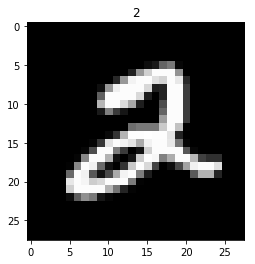

In [9]:
plt.imshow(training_images[5][:,:,0], cmap='gray')
plt.title(np.argwhere(training_labels[5]>0)[0][0])
print(training_labels[5])

## 1.5 Creation of validation set

For the creation of validation data set we will use the train_test_split function of sklearn. We will make the validation set with 10% of the training set which means for the given data out our validation set will be 6000 examples and the training data set will be of 54000 examples. Same will be with the labels.

In [10]:
# Split the train and the validation set for the fitting
training_images, validation_images, training_labels,validation_labels = train_test_split(training_images, training_labels, test_size = 0.1)

In [11]:
image=[]
label=[]
for i in range (9,18):
    image.append(training_images[i][:,:,0])
    label.append(np.argwhere(training_labels[i]>0)[0][0])

In [12]:
def plot_images(images, class_true, class_pred=None):
    assert len(images) == len(class_true) == 9
    
    # Create figure with 3x3 sub-plots.
    f, ax = plt.subplots(3, 3)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if class_pred is None:
            xlabel = "True: {0}".format(class_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_true[i], class_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Plotting the training data and its true labels

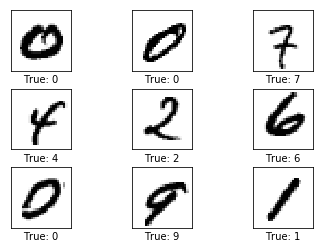

In [13]:
plot_images(image, label)

In [15]:
# batch size
batch = 128
# number of epoches
epoch = 25
# number of convolutional filters
filters = 32
# convolution filter size
filter_size = (3, 3)
# pooling size
pooling_size = (2, 2)
#%%

epochs = 5 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

 

## 1.6 Create the Convolutional Neural Networks (CNN)
#### 1.  Define the model
#### 2.  Compile the model
#### 3.  Fit the model
First of all let us define the shape of the image before we define the model

**Types of layers used in the network**

**Convolution Layer:**

As we know that while dealing with the images in the neural network the most widely used and adviced layer is the convolution layer because of its ability to reduce the noise and remove the low frequency from the image. Here we will be using 2 convolution layers. After thorough research about number of layers to be used for this particular application, I have come to conclusion to use 2 convolution layers and since we are dealing with 2 dimensional image it make sense to use the 2D convolution layers which is offered by Keras in tensorflow.

To decide the size of the kernel and the filter size I have done many trials and noted the accuracy, though it did not affect too much (small variations were noticed) as I am running the network for 6 epochs but on greater itterations it makes a big difference. In this network I am using a filter size of 32 and 32 (i.e number of hidden neurons in each layer) for $1^{st}$ and $2^{nd}$ layers respectively. The size of the kernel used is [3,3] for both the layers. 

Actiavation function for the convolution layer can be of any choice and ehre I am using the famous and most widely used ReLU activation function to get the non linear output. I have tested with the sigmoid function as well but the accurancy didnt change much so I am sticking to the ReLU activation function.

**MaxPooling:**

Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions. The size of the maxpooling window is usually [2,2] to reduce the current layer size by half.

**Dropout Layer:**

As you can see from the code block, we’ll also be utilizing dropout in our network architecture. Dropout works by randomly disconnecting nodes from the current layer to the next layer. This process of random disconnects during training batches helps naturally introduce redundancy into the model — no one single node in the layer is responsible for predicting a certain class, object, edge, or corner.

Here we are choosing the probability to drop the connected edges to be 25%. the ideal range to select the probabilities is from 50% - 20 %. We are applying 2 droput layers with same probabilities of 25% and 50%. 

**Flatten:**

Since we were working in the 2 dimensional by applying the 2D convolution layers and now we want to add the 1 dimensional hidden layer with some specified amount of hidden neuron, flatten function facilitates this functionality. It helps reduce the 2D into 1D so that we are able to compute the labels which are linear. 


**Fully connected layer or dense layer:**

Since we need the linear output we have to add the fully connected layers and the fuunction used for this is 'dense()'.
Here we are using 128 neurons in the hidden fully connected layer and since our ouput should be and number between 0-10 to classify the  MNIST data we are using 10 neuron in the output layer. The standard neuron numbers in the hidden layers are usually 64,128,256,512...

Here also we are using activation function as ReLU and since we have the classification problem to test for so, we we have to use the softmax activation function in the output layer.

In [16]:
# Layer struture:
model = Sequential()
# Conv 1: First convolutional layer. Arguments: number of filters, filter size, padding mode, input structure.
model.add(Convolution2D(filters, (filter_size[0], filter_size[1]), input_shape=(28,28,1)))
# Activ1: First activation layer using relu activation function.
model.add(Activation('relu'))
# Conv 2: Second convolutional layer.
model.add(Convolution2D(filters, (filter_size[0], filter_size[1])))
# Activ2: Second activation layer using relu activation function.
model.add(Activation('relu'))
# MaxPool1: First pooling layer using maxpooling method, Argument: pooling size.
model.add(MaxPooling2D(pool_size=pooling_size))
# Dropout1: First dropout layer. Drop (set to zero) 25% of neurons.
model.add(Dropout(0.25))
# Flatten1: First flatten layer.
model.add(Flatten())
# FC1: First fully connected layer.
model.add(Dense(128))
# Activ 3: Third activation layer using relu activation function.
model.add(Activation('relu'))
# Dropout2: Second dropout layer. Drop (set to zero) 50% of neurons.
model.add(Dropout(0.5))
# FC2: Second fully connected layer.
model.add(Dense(10))
# Activ 3: Forth activation layer using softmax activation function.
model.add(Activation('softmax'))

**Optimizer:**

We are using Adam optimizer which is equivalent to the stochastic gradient descent which is widely used to solve the convex optimization problem and is also efficient in solving non convex problems as well.
Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


Adam is known for combining the advantages of two other extensions of stochastic gradient descent. Specifically:

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

The parameter primarily used are:
1. Learning rate : The learning rate as we know which is used in linear regression machine leaning which signifies the gradient step in the direction of the minima. 
2. Epsilon: Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).

In [17]:
# Define the optimizer
optimizer = adam(lr=0.001, epsilon=1e-08, decay=0.0)

In [18]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
# Fit the model
history = model.fit(training_images,training_labels, batch_size=batch_size,
                              epochs = epochs, 
                            validation_data = (validation_images,validation_labels),
                              verbose = 2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 56s - loss: 0.2546 - acc: 0.9230 - val_loss: 0.0657 - val_acc: 0.9793
Epoch 2/5
 - 56s - loss: 0.0953 - acc: 0.9711 - val_loss: 0.0470 - val_acc: 0.9848
Epoch 3/5
 - 56s - loss: 0.0721 - acc: 0.9789 - val_loss: 0.0394 - val_acc: 0.9882
Epoch 4/5
 - 56s - loss: 0.0594 - acc: 0.9821 - val_loss: 0.0361 - val_acc: 0.9888
Epoch 5/5
 - 57s - loss: 0.0529 - acc: 0.9835 - val_loss: 0.0366 - val_acc: 0.9898


**Observation:** 

Since out validation accuracy is more than the training accuracy in each itterations and since it is increasing continuously we can infer that our model will not overfit the testing data and will give the similar accuracy as the trainig accuracy.

**Plotting the loss function and accuracy**

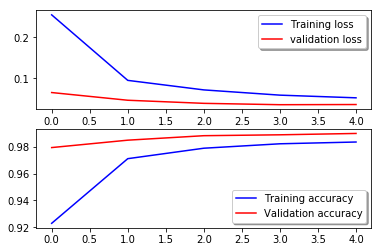

In [23]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Computing the wrong predictions**

In [24]:
# Predict the values from the validation dataset
Y_pred = model.predict(validation_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(validation_labels,axis = 1) 

61


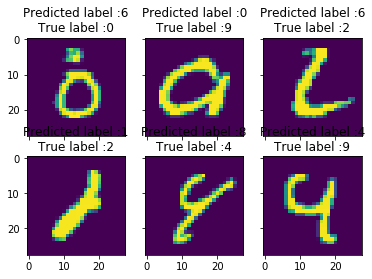

In [25]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = validation_images[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
print(len(sorted_dela_errors))

## Running on Test data 

In [26]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03163621122988552
Test accuracy: 0.9893


# Running Tensorboard

We are using tensorborad for better visualization of various graphs of accuracy, loss, biases, weights etc...

In [28]:
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()), write_graph=True, write_images=True, histogram_freq=1)

model.fit(training_images, training_labels, validation_data=(test_images, test_labels), verbose=1, callbacks=[tensorboard])

Train on 54000 samples, validate on 10000 samples
Epoch 1/1
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0663 - acc: 0.9795 - val_loss: 0.0347 - val_acc: 0.9886


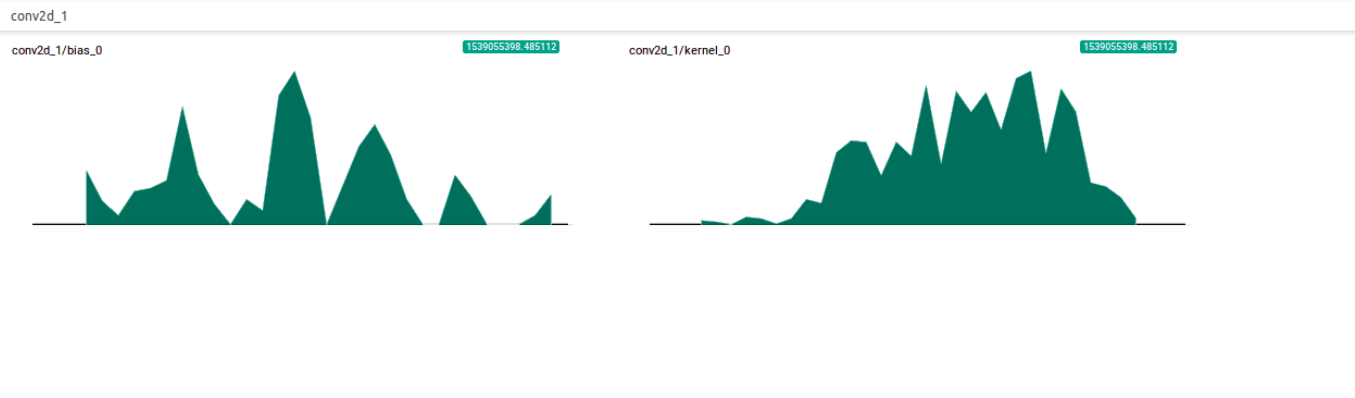

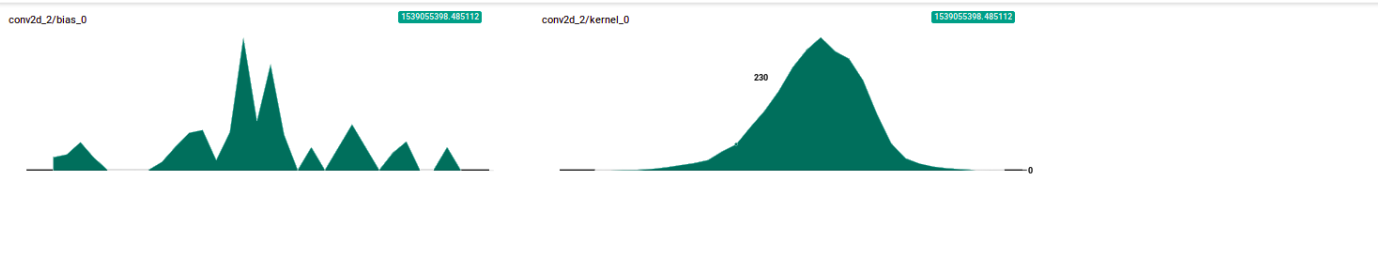

## References

1. https://keras.io/ 
2. https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer
3. https://www.pyimagesearch.com/2018/04/16/keras-and-convolutional-neural-networks-cnns/
4. http://fizzylogic.nl/2017/05/08/monitor-progress-of-your-keras-based-neural-network-using-tensorboard/
5. http://fizzylogic.nl/2017/05/08/monitor-progress-of-your-keras-based-neural-network-using-tensorboard/
 